In [15]:
#importing the libraries
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [16]:
data = pd.read_csv(r'C:\Users\DELL\Desktop\projects\Mall_customer_dataset/Mall_Customers.csv')

In [17]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
data.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [19]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


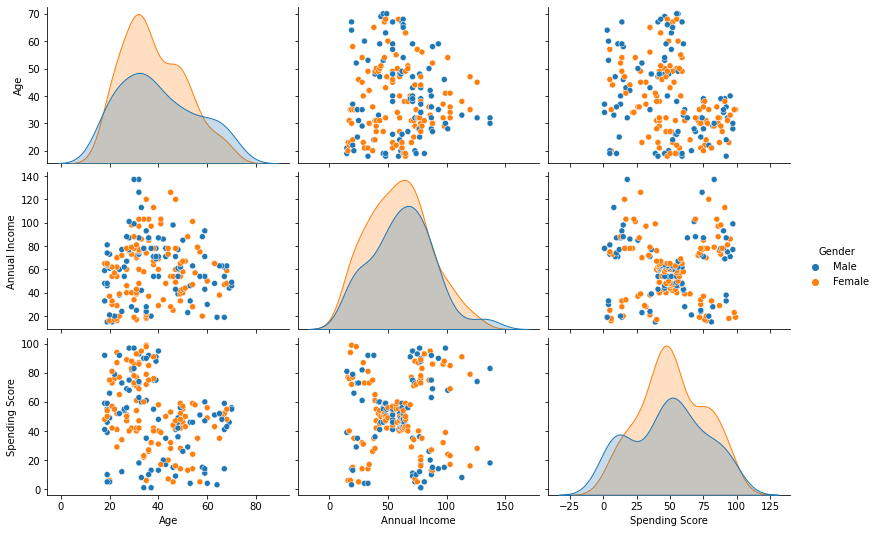

In [21]:
#creating a pairplot 
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

We can see that the datapoints are evenly distributed regardless of the gender, 
thus we can drop the gender column, along with the customer_id

In [22]:
#dropping Customer ID and Gender
x=data.drop(['CustomerID','Gender'],axis=1)

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

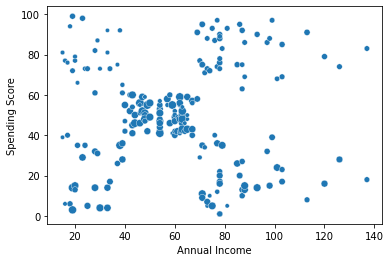

In [48]:
#creating a scatterplot to see the distribution of data
sns.scatterplot(data=x,x=x['Annual Income'],y=x['Spending Score'],s=x.Age )

# K-Means Clustering Algorithm

In [24]:
#trying to find the optimal value of k
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    km.fit(x)
    clusters.append(km.inertia_)

Inertia: Intuitively, inertia tells how far away the points within a cluster are. 
    
   Therefore, a small of inertia is aimed for. 
    
   The range of inertia’s value starts from zero and goes up.

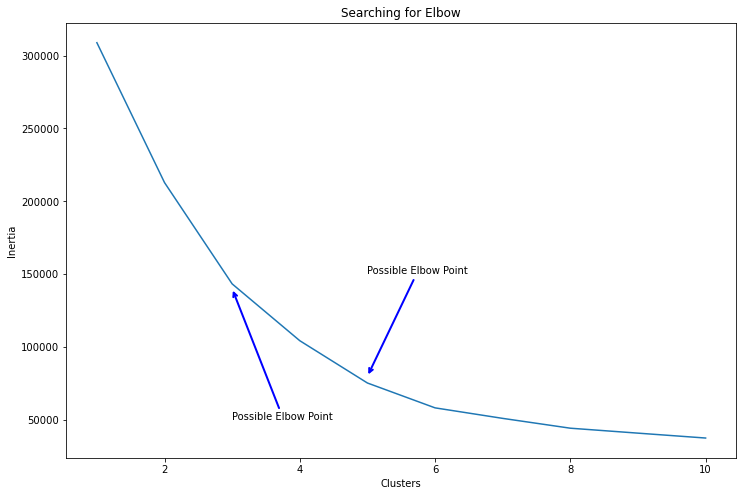

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for optimal K value using elbow point')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

A good model is one with low inertia AND a low number of clusters (K). 
However, this is a tradeoff because as K increases, inertia decreases.

To find the optimal K for a dataset, use the Elbow method;
find the point where the decrease in inertia begins to slow. 
As we can in the graph above, there are two possible elbow points
K=3 and k=5 are the potential “elbow” of this graph.

### Fitting the model using k=3

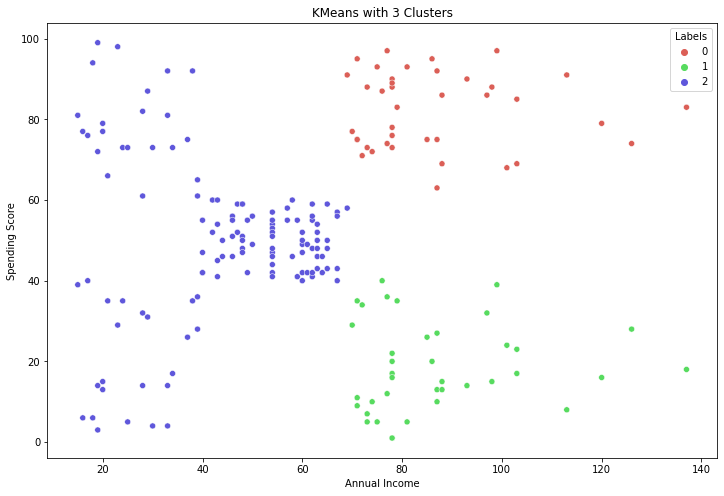

In [37]:
km3 = KMeans(n_clusters=3).fit(x)

x['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### Fitting the model using k=5

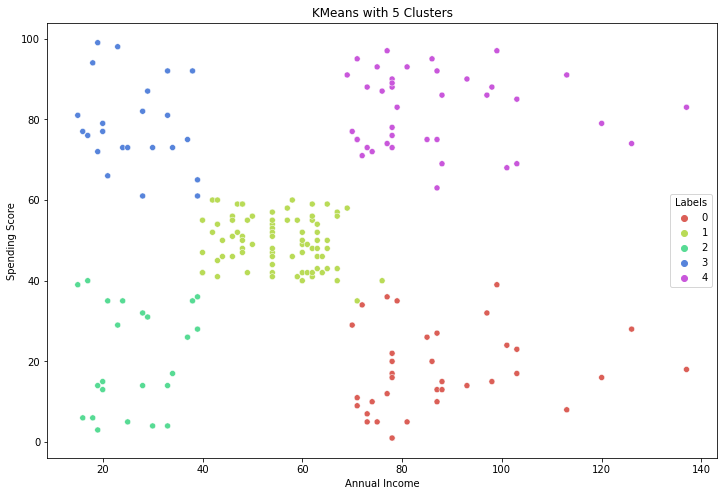

In [41]:
km5 = KMeans(n_clusters=5).fit(x)

x['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x['Annual Income'],y= x['Spending Score'], hue=x['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

As we can see here there are 5 distinct clusters:
    
    Cluster 0 is low income and low spending
    
    Cluster 1 is high income and high spending
    
    Cluster 2 is mid income and mid spending
    
    Cluster 3 is high income and low spending
    
    Cluster 4 is low income and high spending

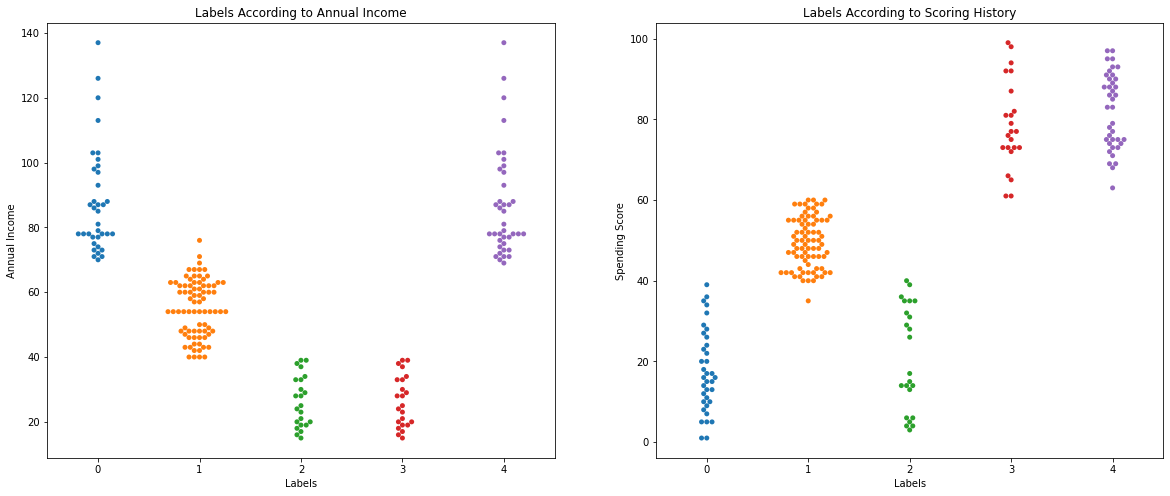

In [43]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income', data=x, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score', data=x, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

# Hierarchical Clustering